In [3]:
from torch.utils.data import dataset
import matplotlib.pyplot as plt

from dataset import CatDogDataset

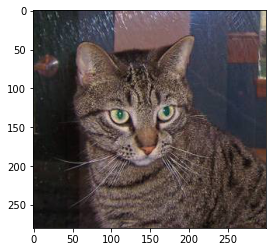

cat


In [33]:
dataset = CatDogDataset()
img, label = dataset.__getitem__(0)

plt.imshow(img)
plt.show()
print(label)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


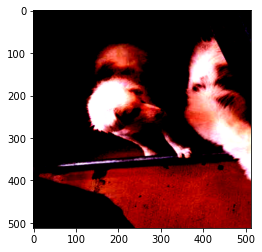

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
dog


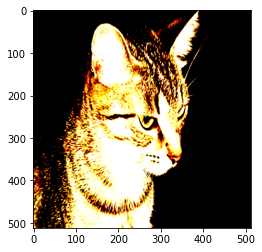

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
cat


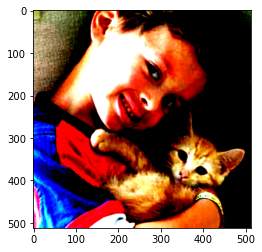

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
cat


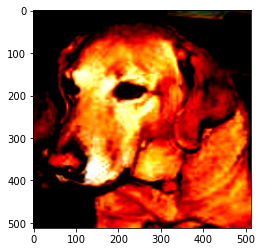

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
dog


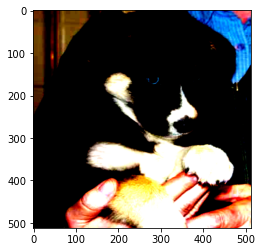

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
dog


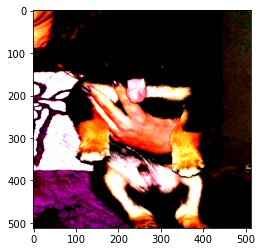

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
dog


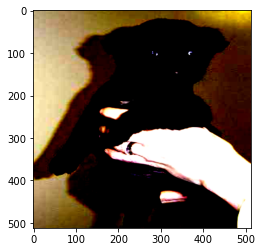

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
dog


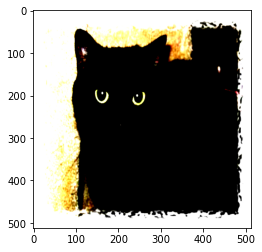

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
cat


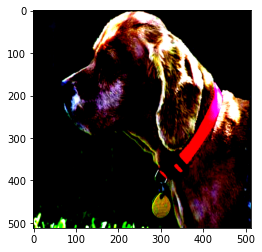

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
dog


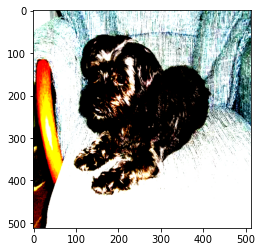

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
dog


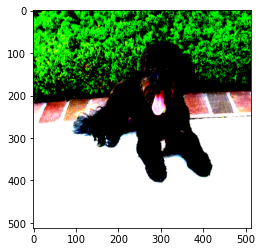

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
dog


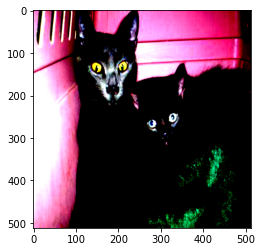

cat


In [41]:
from torch.utils.data import Dataset, DataLoader
import albumentations
import albumentations.pytorch

train_transfrom = albumentations.Compose([
    albumentations.Normalize(mean=[0.5, 0.5, 0.5], std=[0.2, 0.2, 0.2]),
    albumentations.Resize(512, 512),
    albumentations.pytorch.transforms.ToTensorV2()
])

dataset = CatDogDataset(transform=train_transfrom)

train_loader = DataLoader(
    dataset,
    batch_size=4,
    shuffle=True
)

cnt = 0
for idx, train_batch in enumerate(train_loader):
    img, label = train_batch
    for i in range(len(img)):
        plt.imshow(img[i].permute(1, 2, 0))        
        plt.show()
        print(label[i])
    cnt += 1
    if cnt == 3:
        break

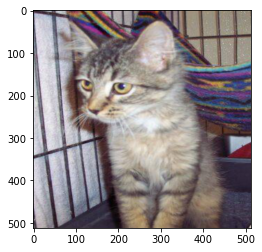

In [40]:
from torch.utils.data import Dataset, DataLoader
import albumentations
import albumentations.pytorch
from PIL import Image
import numpy as np

train_transfrom = albumentations.Compose([    
    albumentations.OneOf([
        albumentations.CenterCrop(224, 224),
        albumentations.VerticalFlip()
    ]),
    albumentations.Resize(512, 512),
    albumentations.pytorch.transforms.ToTensorV2()
])

img = Image.open('./data/cat.2.jpg')
img = train_transfrom(image=np.array(img))['image']
plt.imshow(img.permute(1, 2, 0))
plt.show()